In [1]:
from adjustText import adjust_text

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('qualitization_wanna_buy.csv')
display(df.head())

,id,購買意欲,容量,形,色,回答者
0,0,◯,1l,円柱,青,A
1,1,×,1l,円柱,緑,A
2,2,△,1l,円柱,赤,A
3,3,◯,1l,4角柱,青,A
4,4,△,1l,4角柱,緑,A


Meanings

- 購買意欲: how the respondant want to buy the item
    - ◯: want to buy
    - △: medium
    - ×: don't want to buy
- 容積: volume
    - 1l: 1l
    - 500ml: 500ml
    - 300ml: 300ml
- 形: shape
    - 円柱: cylinder
    - 4角柱: quadangular-prism
- 色: color
    - 赤: Red
    - 緑: Green
    - 青: Blue
- 回答者: respondant


## apply quantification_III

In [3]:
df['item_type'] = df['容量']+ '_' + df['形'] + '_' + df['色'] # 商品の特徴の組み合わせを列に追加
df['response'] = (df['購買意欲']=='◯').astype('int') # 購買意欲が'○'を'1'に変換して（その他は0）列に追加
df_response = df.set_index(['回答者', 'item_type'])['response'].unstack() # 回答者→index, item_type→column
df_response

item_type,1l_4角柱_緑,1l_4角柱_赤,1l_4角柱_青,1l_円柱_緑,1l_円柱_赤,1l_円柱_青,300ml_4角柱_緑,300ml_4角柱_赤,300ml_4角柱_青,300ml_円柱_緑,300ml_円柱_赤,300ml_円柱_青,500ml_4角柱_緑,500ml_4角柱_赤,500ml_4角柱_青,500ml_円柱_緑,500ml_円柱_赤,500ml_円柱_青
回答者,,,,,,,,,,,,,,,,,,
A,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
B,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1
C,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1
D,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
E,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
F,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1
G,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1
H,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
I,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1


In [4]:
# 値が0のみの行・列がある場合（逆行列が存在しないので）計算ができないので除外
# >>>そもそも完全に1もしくは0の場合趣味嗜好の偏りがなく特徴がないので分析に使用できない
df_response = df_response.loc[df_response.sum(axis=1)>0, :]
df_response = df_response.loc[:, df_response.sum(axis=0)>0]
df_response

item_type,1l_4角柱_緑,1l_4角柱_赤,1l_4角柱_青,1l_円柱_緑,1l_円柱_赤,1l_円柱_青,300ml_4角柱_青,300ml_円柱_青,500ml_4角柱_緑,500ml_4角柱_赤,500ml_4角柱_青,500ml_円柱_緑,500ml_円柱_赤,500ml_円柱_青
回答者,,,,,,,,,,,,,,
A,0,0,1,0,0,1,1,1,0,0,1,0,0,1
B,1,0,1,0,0,1,0,0,1,0,1,1,0,1
C,0,1,1,0,1,0,0,0,0,1,1,0,1,1
D,1,0,1,1,0,1,0,0,0,0,1,0,0,1
E,0,1,1,0,1,0,0,0,0,1,1,0,1,0
F,0,0,0,0,0,1,0,1,0,0,1,1,1,1
G,0,0,0,0,0,1,0,1,0,1,1,1,1,1
H,0,0,0,0,0,1,0,0,0,0,1,1,1,1
I,0,0,0,0,0,1,0,1,0,0,1,1,1,1


In [5]:
nda_respondent = np.diag(df_response.sum(axis=1))
nda_response = df_response.values
nda_item = np.diag(df_response.sum(axis=0))

nda_respondent_half_inv = np.diag(df_response.sum(axis=1)**(-1/2))
nda_item_half_inv = np.diag(df_response.sum(axis=0)**(-1/2))

nda_standardized_response = nda_respondent_half_inv.dot(nda_response).dot(nda_item_half_inv)

print('========', 'nda_respondent', '========')
display(nda_respondent)
print('========', 'nda_response', '========')
display(nda_response)
print('========', 'nda_item', '========')
display(nda_item)
# print('========', 'nda_respondent_half_inv', '========')
# display(nda_respondent_half_inv)
# print('========', 'nda_item_half_inv', '========')
# display(nda_item_half_inv)
# print('========', 'nda_standardized_response', '========')
# display(nda_standardized_response)

======== nda_respondent ========


array([[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]])

======== nda_response ========


array([[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1]])

======== nda_item ========


array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11]])

In [6]:
nda_respondent = np.diag(df_response.sum(axis=1)) #　回答者のresponseの合計を対角行列に
nda_response = df_response.values
nda_item = np.diag(df_response.sum(axis=0)) #　item_typeのresponseの合計を対角行列に

nda_respondent_half_inv = np.diag(df_response.sum(axis=1)**(-1/2)) #　回答者のresponseの-1/2乗合計を対角行列に
nda_item_half_inv = np.diag(df_response.sum(axis=0)**(-1/2)) #　item_typeのresponseの-1/2乗合計を対角行列に

nda_standardized_response = nda_respondent_half_inv@(nda_response)@(nda_item_half_inv)

np.set_printoptions(linewidth=10000)
print('\n========', 'nda_respondent', '========')
display(nda_respondent)
print('\n========', 'nda_response', '========')
display(nda_response)
print('\n========', 'nda_item', '========')
display(nda_item)
print('\n========', 'nda_respondent_half_inv', '========')
display(nda_respondent_half_inv)
print('\n========', 'nda_item_half_inv', '========')
display(nda_item_half_inv)
print('\n========', 'nda_standardized_response', '========')
display(nda_standardized_response)


======== nda_respondent ========


array([[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]])


======== nda_response ========


array([[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1]])


======== nda_item ========


array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11]])


======== nda_respondent_half_inv ========


array([[0.40824829, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.37796447, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.37796447, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.40824829, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.40824829, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.40824829, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.


======== nda_item_half_inv ========


array([[0.70710678, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.70710678, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.4472136 , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.70710678, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.31622777, 0.        , 0.        , 0.        ,


======== nda_standardized_response ========


array([[0.        , 0.        , 0.18257419, 0.        , 0.        , 0.12909944, 0.40824829, 0.15430335, 0.        , 0.        , 0.11785113, 0.        , 0.        , 0.12309149],
       [0.26726124, 0.        , 0.16903085, 0.        , 0.        , 0.11952286, 0.        , 0.        , 0.37796447, 0.        , 0.10910895, 0.13363062, 0.        , 0.11396058],
       [0.        , 0.26726124, 0.16903085, 0.        , 0.26726124, 0.        , 0.        , 0.        , 0.        , 0.21821789, 0.10910895, 0.        , 0.12598816, 0.11396058],
       [0.28867513, 0.        , 0.18257419, 0.40824829, 0.        , 0.12909944, 0.        , 0.        , 0.        , 0.        , 0.11785113, 0.        , 0.        , 0.12309149],
       [0.        , 0.28867513, 0.18257419, 0.        , 0.28867513, 0.        , 0.        , 0.        , 0.        , 0.23570226, 0.11785113, 0.        , 0.13608276, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.12909944, 0.        , 0.15430335, 0.        ,

In [7]:
# 特異行列を取得
u, s, vh = np.linalg.svd(nda_standardized_response)

# qualitization vector
qualitization_vector_respondent = nda_respondent_half_inv@(u)
qualitization_vector_item = nda_item_half_inv@(vh.T)

# eigen values
eigen_values = s**2

df_qual_vec_respondent = pd.DataFrame(qualitization_vector_respondent, index=df_response.index)
df_qual_vec_item = pd.DataFrame(qualitization_vector_item, index=[k for k in df_response.columns])

print('========', 'df_qual_vec_respondent', '========')
display(df_qual_vec_respondent)
print('========', 'df_qual_vec_item', '========')
display(df_qual_vec_item)

======== df_qual_vec_respondent ========


,0,1,2,3,4,5,6,7,8,9,10,11
回答者,,,,,,,,,,,,
A,0.116248,0.037832,-0.029521,0.381184,0.068755,0.003468,0.026943,0.009167,-1.802337e-18,5.502340e-34,3.910765e-50,-6.884698e-67
B,0.116248,0.047400,-0.195645,-0.104577,0.278326,0.014209,-0.014677,-0.001040,6.811652e-17,-2.056664e-18,-4.991323e-20,-1.249932e-17
C,0.116248,-0.225046,0.018050,-0.007312,0.002448,-0.042259,0.030413,-0.274958,2.342973e-17,5.279447e-18,-7.343739e-19,-1.219356e-17
D,0.116248,0.025598,-0.289131,-0.012892,-0.261847,0.010106,-0.006685,0.004935,1.949252e-17,7.283742e-18,4.332296e-19,3.501551e-18
E,0.116248,-0.272935,0.020854,-0.010356,0.007995,-0.026697,-0.058435,0.271893,-1.538332e-17,3.708569e-18,-2.940525e-19,6.798140e-18
F,0.116248,0.071098,0.073486,-0.026905,-0.021050,-0.044015,-0.078920,-0.005657,3.651484e-01,1.948864e-18,3.726169e-19,-2.116342e-18
G,0.116248,0.009701,0.078497,-0.035443,-0.021311,0.338663,0.081657,0.004095,4.941346e-17,-5.296474e-19,1.134326e-18,-3.267868e-18
H,0.116248,0.059942,0.055178,-0.061829,-0.014830,-0.155019,0.382983,0.071408,-7.132914e-17,-5.654537e-18,1.994558e-18,1.912169e-18
I,0.116248,0.071098,0.073486,-0.026905,-0.021050,-0.044015,-0.078920,-0.005657,-9.128709e-02,3.535534e-01,-3.400060e-17,1.331956e-17


======== df_qual_vec_item ========


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1l_4角柱_緑,0.116248,0.054183,-0.403719,-0.129955,0.020706,0.065816,-0.081664,0.026287,2.357886e-01,1.674197e-01,-1.215323e-01,-4.200410e-01,6.665111e-02,-1.108187e-01
1l_4角柱_赤,0.116248,-0.369628,0.032399,-0.019545,0.013122,-0.186650,-0.107127,-0.020684,2.549578e-01,1.845414e-01,4.246027e-01,4.800086e-04,-3.436742e-02,1.448718e-01
1l_4角柱_青,0.116248,-0.114946,-0.158362,0.108880,0.048087,-0.044579,-0.034317,0.026991,-2.581274e-05,-4.841376e-02,-1.039008e-01,1.368753e-01,-2.885680e-01,-1.224309e-01
1l_円柱_緑,0.116248,0.038000,-0.481574,-0.028525,-0.658019,0.054710,-0.051112,0.066615,1.252320e-03,-1.727444e-01,8.168186e-02,3.825732e-01,2.555975e-01,2.471374e-01
1l_円柱_赤,0.116248,-0.369628,0.032399,-0.019545,0.013122,-0.186650,-0.107127,-0.020684,-2.343461e-01,4.436632e-02,-2.512756e-01,1.918327e-02,3.822584e-01,-1.870835e-01
1l_円柱_青,0.116248,0.079564,-0.002197,0.007062,-0.014113,-0.004682,0.057818,0.081374,-9.061969e-02,9.582870e-03,1.686828e-01,-9.262454e-03,2.764597e-02,-1.797439e-01
300ml_4角柱_青,0.116248,0.056162,-0.049169,0.843400,0.172781,0.018776,0.205999,0.123748,2.370409e-01,-5.324677e-03,-3.985048e-02,-3.746785e-02,3.222486e-01,1.363187e-01
300ml_円柱_青,0.116248,0.085470,0.099080,0.066762,-0.020753,0.094393,-0.312386,-0.028964,-8.712701e-17,-4.765817e-17,-1.328151e-17,-4.706656e-18,9.365039e-19,-1.046263e-17
500ml_4角柱_緑,0.116248,0.070366,-0.325864,-0.231384,0.699432,0.076921,-0.112215,-0.014040,-1.099532e-01,-3.436554e-01,1.809383e-01,2.167721e-01,2.239204e-01,2.320361e-01
500ml_4角柱_赤,0.116248,-0.241618,0.065181,-0.039170,-0.009104,0.486691,0.136692,0.004638,6.052441e-17,3.347641e-17,6.614519e-17,1.372357e-16,1.350080e-16,8.546375e-17


## visualize

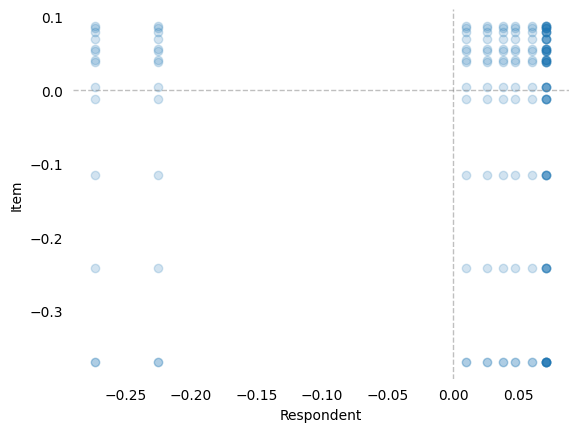

In [8]:
# 相関係数を最大にする配置の散布図

df_with_1st_qual = df.merge(df_qual_vec_respondent[[1]], how='left', left_on='回答者', right_index=True)
df_with_1st_qual = df_with_1st_qual.merge(df_qual_vec_item[[1]], how='left', left_on='item_type', right_index=True)
df_with_1st_qual = df_with_1st_qual.rename(columns={'1_x': 'respondent_1st_qual', '1_y': 'item_1st_qual'})

plt.scatter(df_with_1st_qual['respondent_1st_qual'], df_with_1st_qual['item_1st_qual'], alpha=0.2)

plt.xlabel('Respondent')
plt.ylabel('Item')

#　枠線を非表示
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# 補助線の削除
plt.tick_params(bottom=False, left=False, right=False, top=False) 

plt.axhline(y=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(x=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')

## scatter plot of respondents and items

visualization of respondents


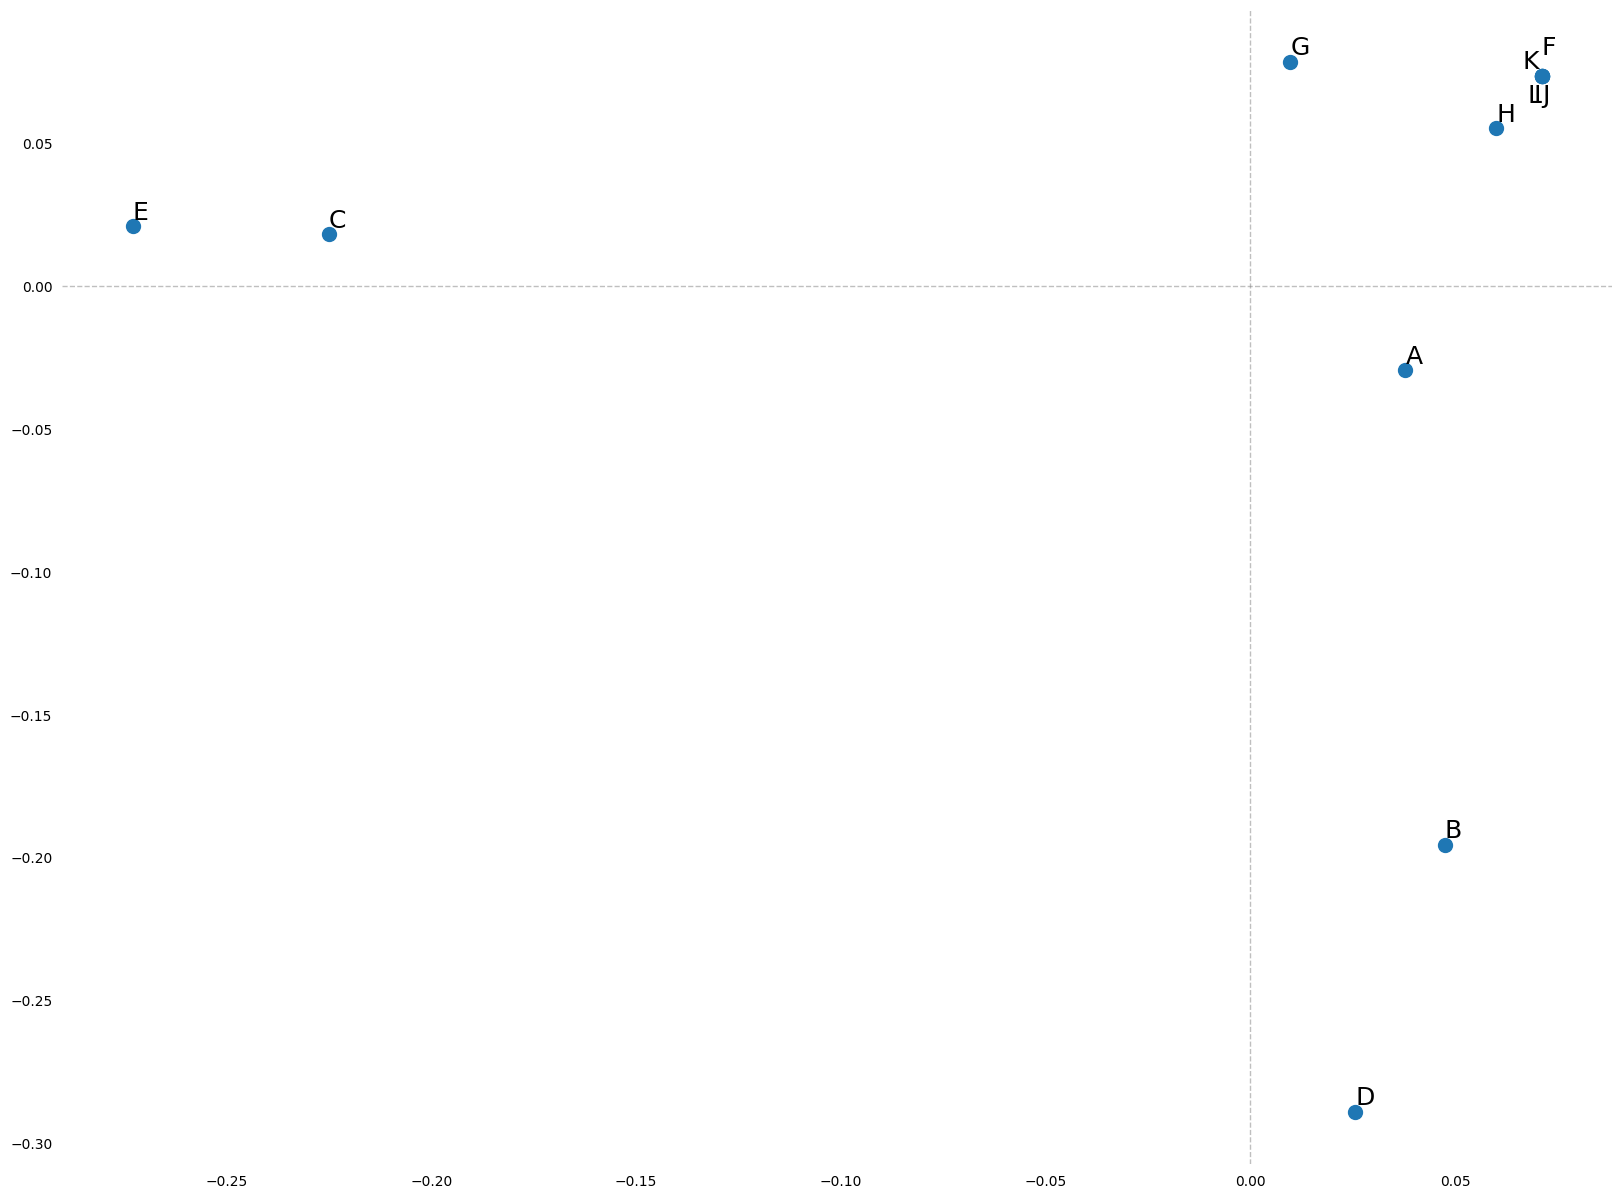

In [9]:
# 回答者の第1、第2固有値をプロット

plt.figure(figsize=(20, 15))
plt.scatter(df_qual_vec_respondent[1], df_qual_vec_respondent[2], s=100)
texts = [plt.text(df_qual_vec_respondent[1][i], df_qual_vec_respondent[2][i], df_qual_vec_respondent.index[i], fontsize=18, ha='center', va='center') for i in range(len(df_qual_vec_respondent))]
adjust_text(texts)

plt.axhline(y=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(x=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')

#　枠線を非表示
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# 補助線の削除
plt.tick_params(bottom=False, left=False, right=False, top=False) 

print("visualization of respondents")

In [10]:
map_shape = {"円柱":"cyl", "4角柱":"quad"}
map_color = {'赤': 'R', '緑': 'G', '青': 'B'}

def label_ja2en(s):
    l = s.split('_')
    return '_'.join([l[0]] + [map_shape[l[1]]] + [map_color[l[2]]])

visualization of items


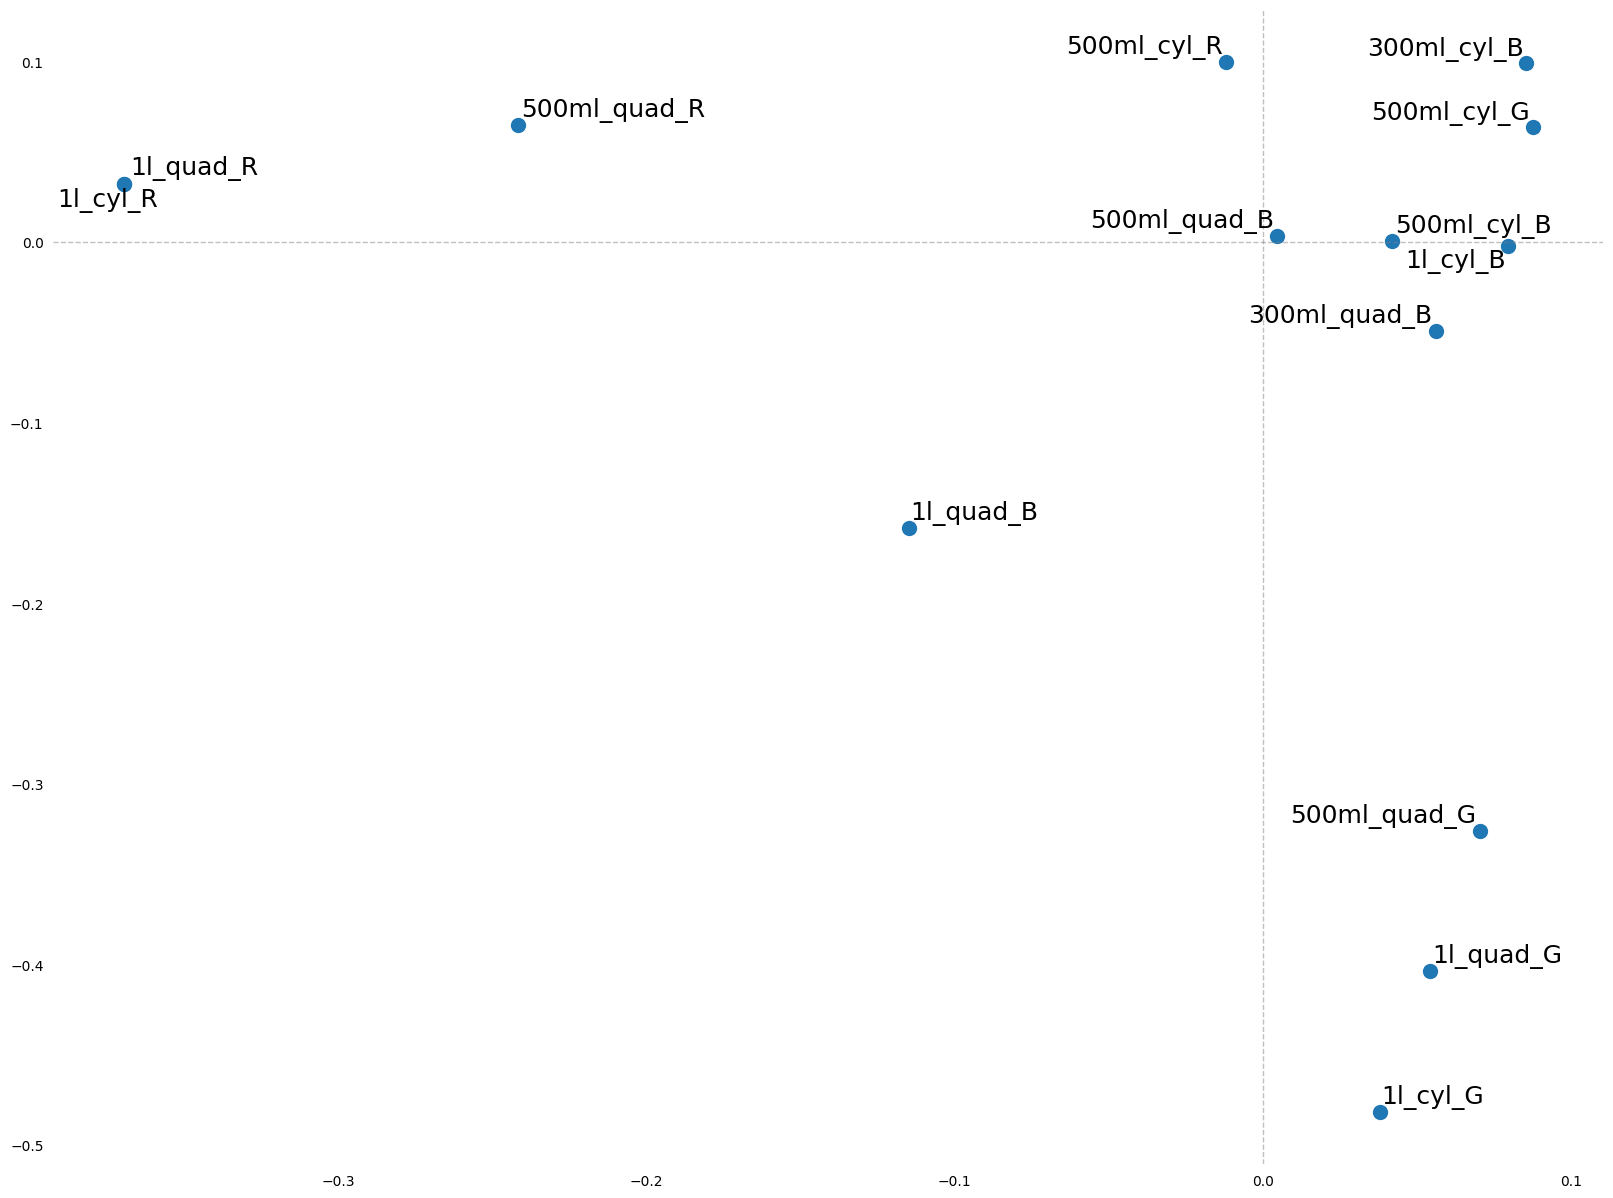

In [11]:
# アイテムの第1、第2固有値をプロット
plt.figure(figsize=(20, 15))
plt.scatter(df_qual_vec_item[1], df_qual_vec_item[2], s=100)
texts = [plt.text(df_qual_vec_item[1][i], df_qual_vec_item[2][i], label_ja2en(df_qual_vec_item.index[i]), fontsize=18, ha='center', va='center') for i in range(len(df_qual_vec_item))]
adjust_text(texts)

plt.axhline(y=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(x=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')

# 枠線を非表示
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# 補助線の削除
plt.tick_params(bottom=False, left=False, right=False, top=False)

print("visualization of items")

visualiztion of respondents


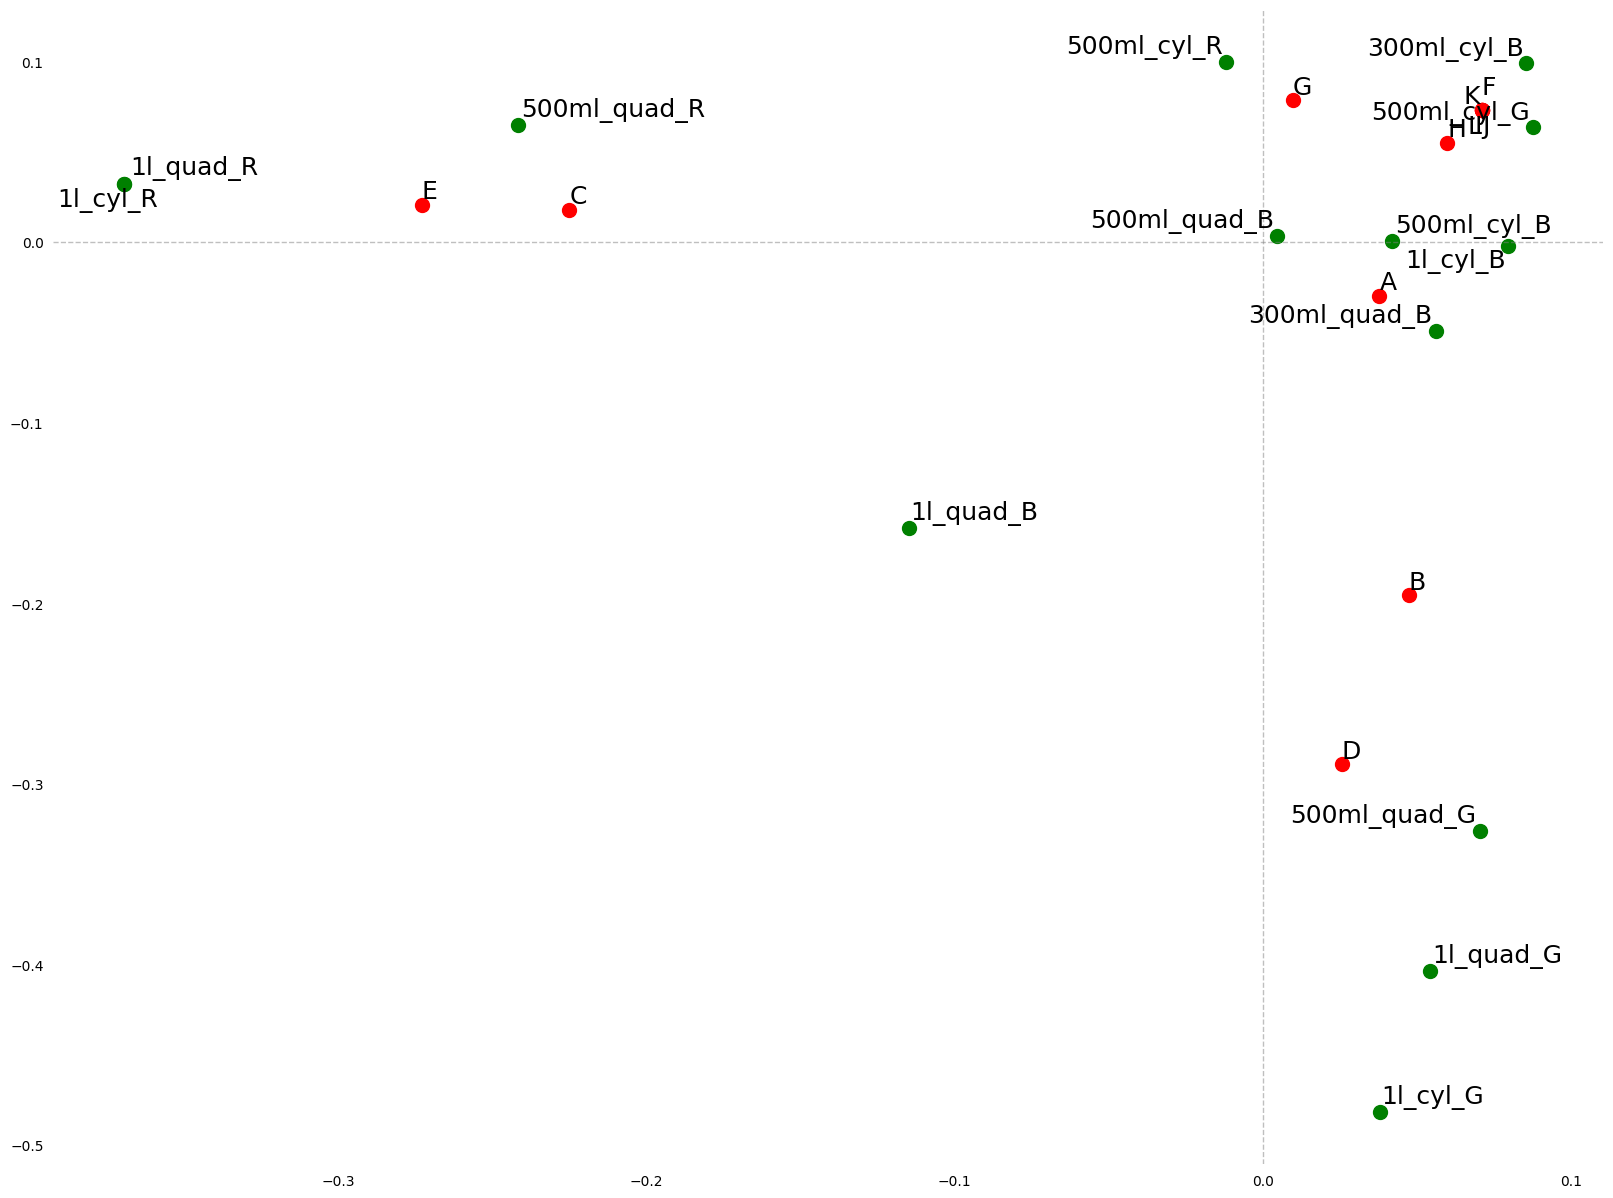

In [12]:
# 回答者とアイテムの第1、第2固有値をプロット
plt.figure(figsize=(20,15))
plt.scatter(df_qual_vec_respondent[1], df_qual_vec_respondent[2], s=100, c='r')
texts = [plt.text(df_qual_vec_respondent[1][i], df_qual_vec_respondent[2][i], df_qual_vec_respondent.index[i], fontsize=18, ha='center', va='center') for i in range(len(df_qual_vec_respondent))]
adjust_text(texts)


plt.scatter(df_qual_vec_item[1], df_qual_vec_item[2], s=100, c='g')
texts = [plt.text(df_qual_vec_item[1][i], df_qual_vec_item[2][i], label_ja2en(df_qual_vec_item.index[i]), fontsize=18, ha='center', va='center') for i in range(len(df_qual_vec_item))]
adjust_text(texts)

plt.axhline(y=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')
plt.axvline(x=0, color='gray', alpha=0.5, linewidth=1, linestyle='--')

# 枠線を非表示
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# 補助線の削除
plt.tick_params(bottom=False, left=False, right=False, top=False)

print("visualiztion of respondents")